In this project, average rating for the board-game is predicted based on the historcal board-game data. This task is attempetd by using three regression models, Linear, Randomforrest and KNN. Performance for each of the model is evaluated using Mean squared error and Mean absolute error.

A preliminary exploratory data analysis is also conducted, based on which the data-set is modified to eliminate noise data points.

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/board-games-prediction-data/games.csv


In [2]:
#Import the necessary packages

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

from sklearn.metrics import mean_squared_error, mean_absolute_error

from sklearn import preprocessing
from sklearn.neighbors import KNeighborsRegressor
import seaborn as sns

In [3]:
df = pd.read_csv("/kaggle/input/board-games-prediction-data/games.csv")
df.head()

,id,type,name,yearpublished,minplayers,maxplayers,playingtime,minplaytime,maxplaytime,minage,users_rated,average_rating,bayes_average_rating,total_owners,total_traders,total_wanters,total_wishers,total_comments,total_weights,average_weight
0,12333,boardgame,Twilight Struggle,2005.0,2.0,2.0,180.0,180.0,180.0,13.0,20113,8.33774,8.22186,26647,372,1219,5865,5347,2562,3.4785
1,120677,boardgame,Terra Mystica,2012.0,2.0,5.0,150.0,60.0,150.0,12.0,14383,8.28798,8.14232,16519,132,1586,6277,2526,1423,3.8939
2,102794,boardgame,Caverna: The Cave Farmers,2013.0,1.0,7.0,210.0,30.0,210.0,12.0,9262,8.28994,8.06886,12230,99,1476,5600,1700,777,3.7761
3,25613,boardgame,Through the Ages: A Story of Civilization,2006.0,2.0,4.0,240.0,240.0,240.0,12.0,13294,8.20407,8.05804,14343,362,1084,5075,3378,1642,4.1590
4,3076,boardgame,Puerto Rico,2002.0,2.0,5.0,150.0,90.0,150.0,12.0,39883,8.14261,8.04524,44362,795,861,5414,9173,5213,3.2943


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81312 entries, 0 to 81311
Data columns (total 20 columns):
id                      81312 non-null int64
type                    81312 non-null object
name                    81271 non-null object
yearpublished           81309 non-null float64
minplayers              81309 non-null float64
maxplayers              81309 non-null float64
playingtime             81309 non-null float64
minplaytime             81309 non-null float64
maxplaytime             81309 non-null float64
minage                  81309 non-null float64
users_rated             81312 non-null int64
average_rating          81312 non-null float64
bayes_average_rating    81312 non-null float64
total_owners            81312 non-null int64
total_traders           81312 non-null int64
total_wanters           81312 non-null int64
total_wishers           81312 non-null int64
total_comments          81312 non-null int64
total_weights           81312 non-null int64
average_weight  

Data-set has around 20 features, and around 81,312 rows of data. It can be noticed from the results of df.info(), that some of the rows have some empty features. For example, minplaytime only has 81309 non null values whereas almost al of the other have 81,312 non null values. Rows with any one of empty feature value is dropped from the analysis.

The dependent variable here is average_rating. The data-set is split into two parts, one part is used for training the model while the other portion is used to test the data. The performance of the model is also evaluated using this test data. 

In [5]:
df = df.drop(columns=["id", "bayes_average_rating", "type", "name"])
df.head()

,yearpublished,minplayers,maxplayers,playingtime,minplaytime,maxplaytime,minage,users_rated,average_rating,total_owners,total_traders,total_wanters,total_wishers,total_comments,total_weights,average_weight
0,2005.0,2.0,2.0,180.0,180.0,180.0,13.0,20113,8.33774,26647,372,1219,5865,5347,2562,3.4785
1,2012.0,2.0,5.0,150.0,60.0,150.0,12.0,14383,8.28798,16519,132,1586,6277,2526,1423,3.8939
2,2013.0,1.0,7.0,210.0,30.0,210.0,12.0,9262,8.28994,12230,99,1476,5600,1700,777,3.7761
3,2006.0,2.0,4.0,240.0,240.0,240.0,12.0,13294,8.20407,14343,362,1084,5075,3378,1642,4.1590
4,2002.0,2.0,5.0,150.0,90.0,150.0,12.0,39883,8.14261,44362,795,861,5414,9173,5213,3.2943


In [6]:
print(df.shape)

(81312, 16)


(array([24380.,   606.,  1325.,  3303.,  6687., 12277., 15849., 11737.,
         3860.,  1288.]),
 array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.]),
 <a list of 10 Patch objects>)

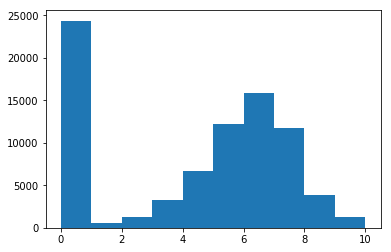

In [7]:
plt.hist(df["average_rating"])

In the above distribution curve, it can be observed that many of the rows have the average rating of zero (which is not possible, since minimum allowed rating is 1); these rows are dropped from the analysis, as such rows are the result of dependent variables having irrationl values, or in many cases null values.
As can be seen below, 24,380 rows have average rating equal to zero.

In [8]:
df1 = df[df["average_rating"]==0]
df1.shape

(24380, 16)

In [9]:
# eliminating all the rows having average_rating = 0 or less than 0, since average rating can not be less than 1.
df = df[df["average_rating"]>0]
df.shape

(56932, 16)

In [10]:
#Selecting games for which number of users who rated the game is greater than zero.
df = df[df["users_rated"] > 0]
df = df.dropna(axis=0)
df.shape

(56930, 16)

Multiple graphs are plotted to visualise how average rating is varying with the other indepedent parameters. This can be done to develop an intuition about the kind of ML algorithm we shall proceed with. This can also reveal some ideas about how the data can be modified for better results.

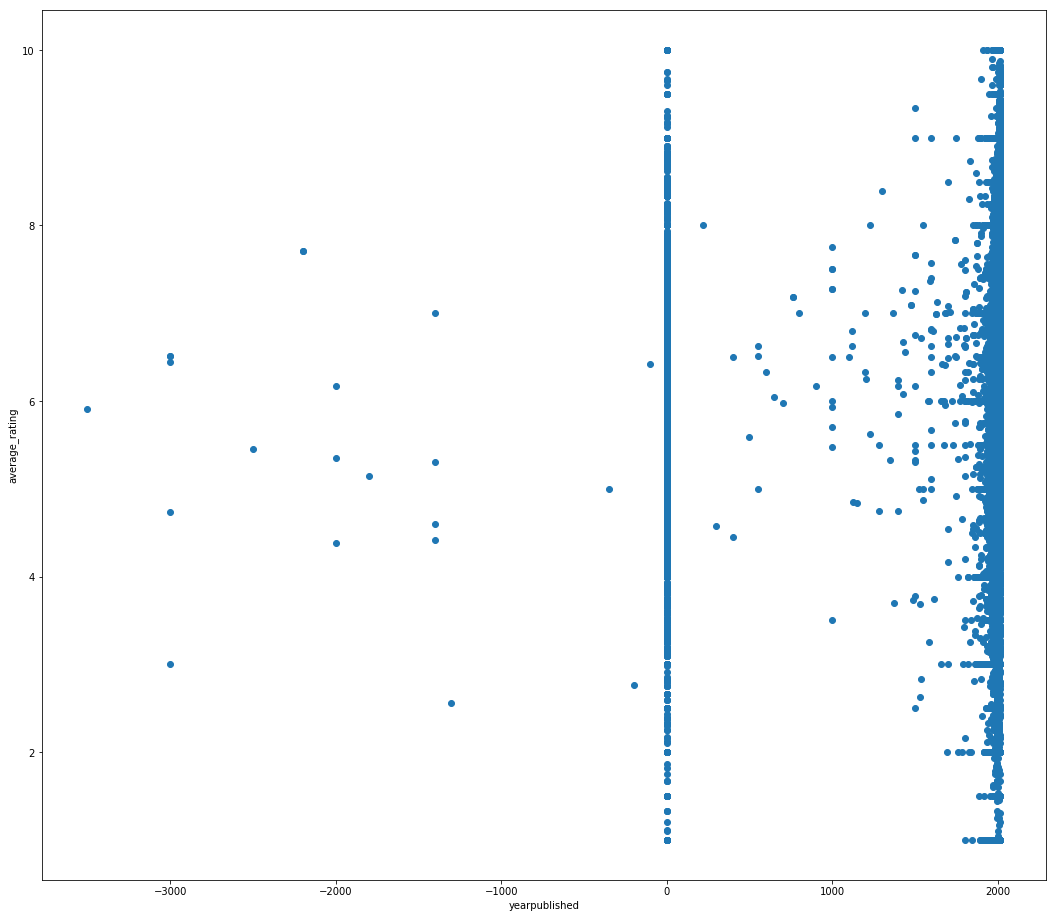

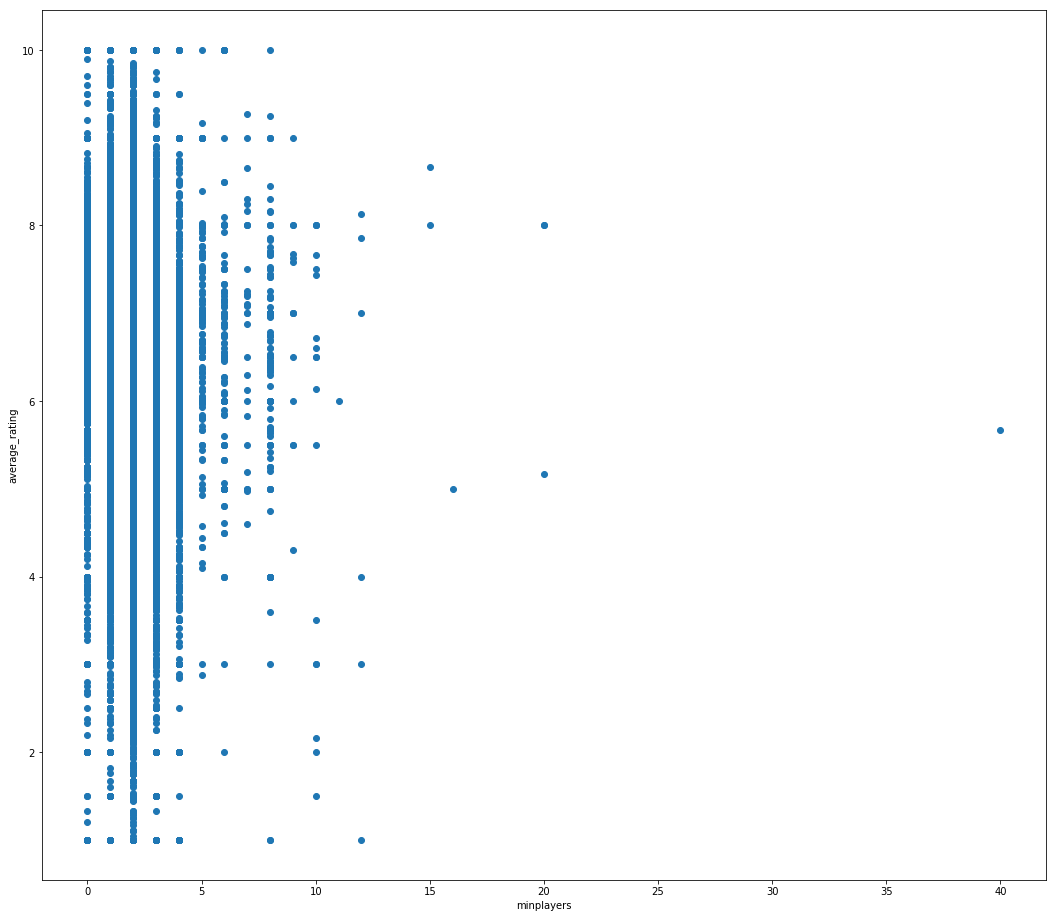

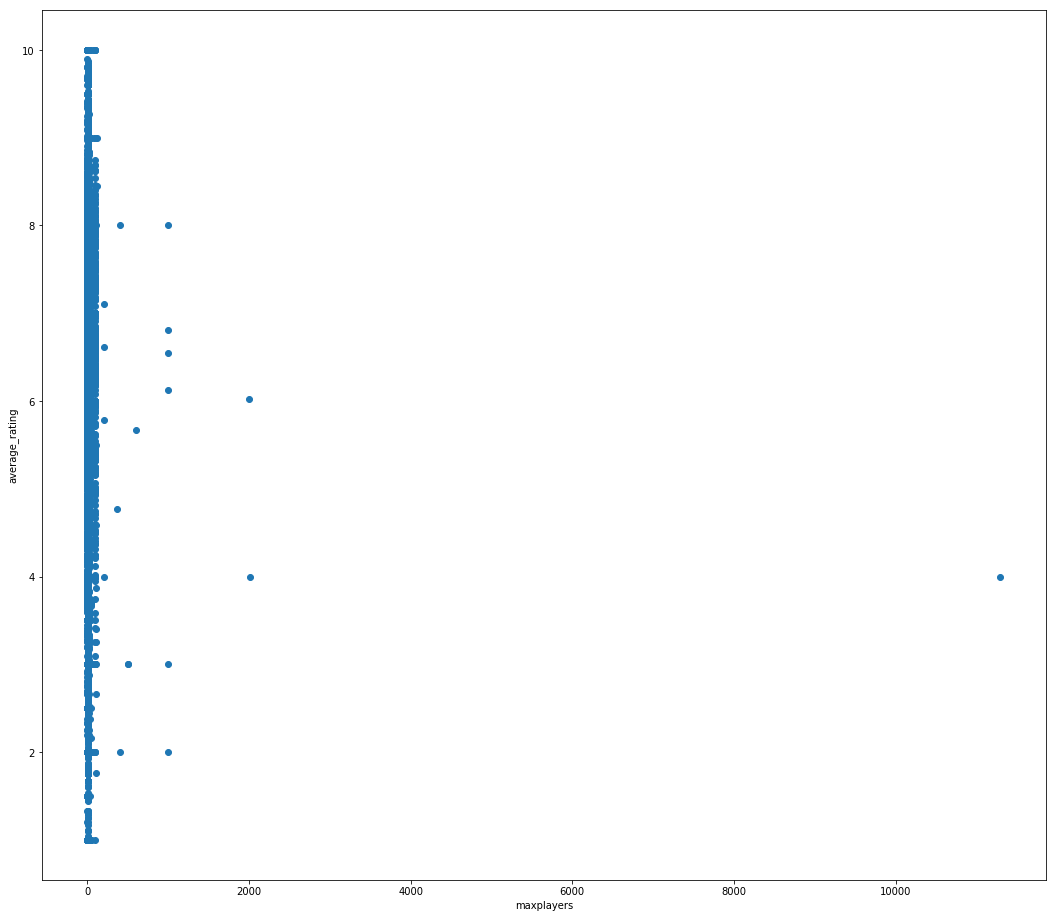

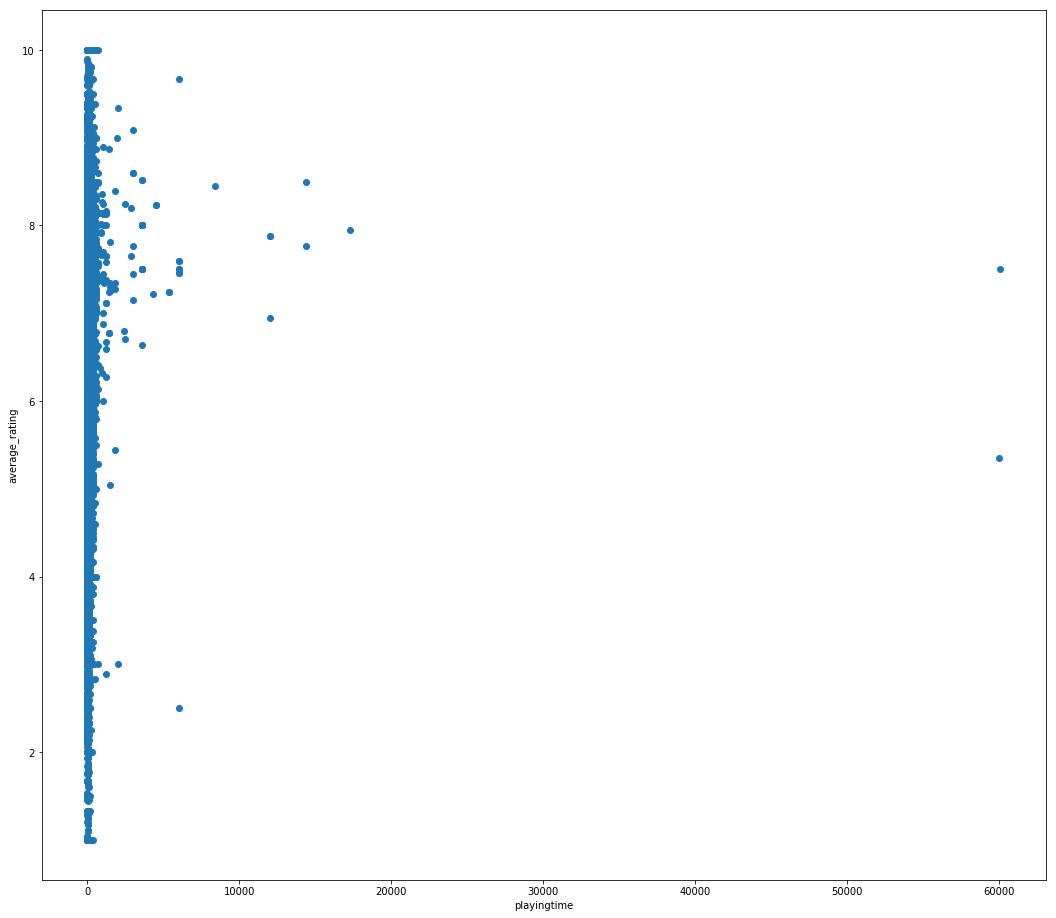

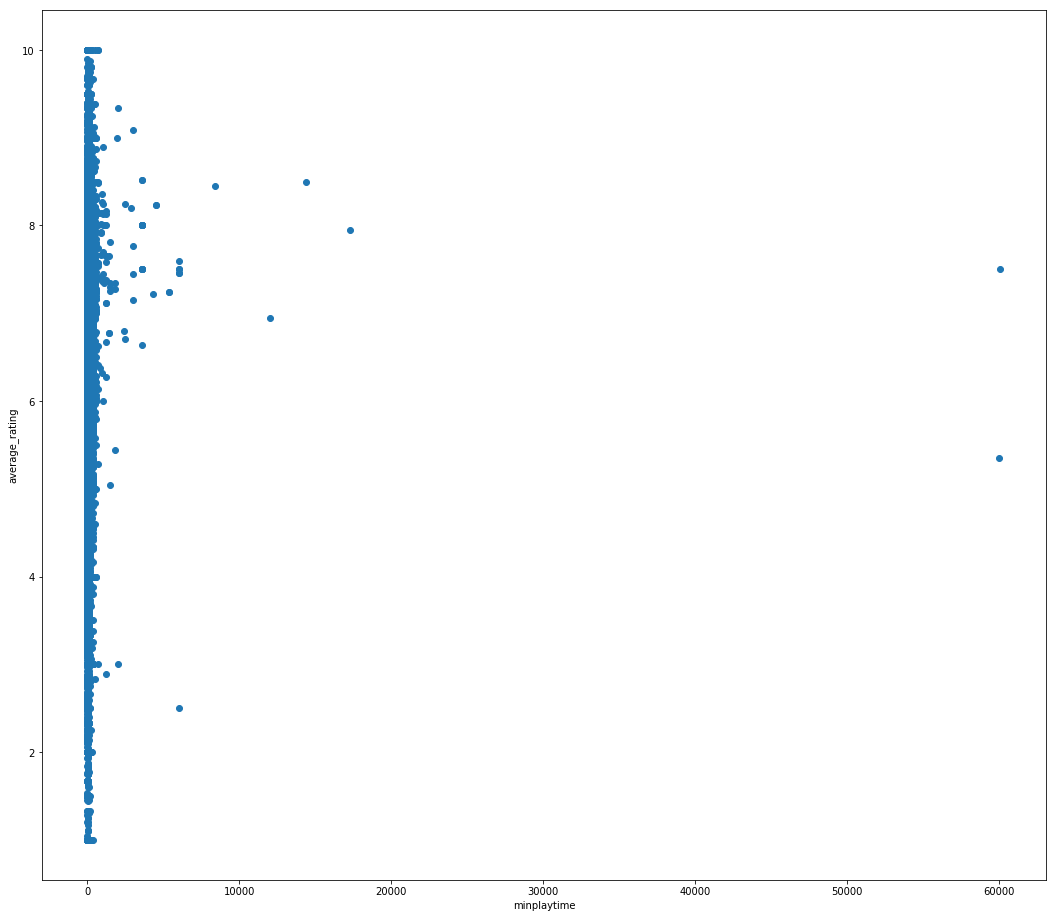

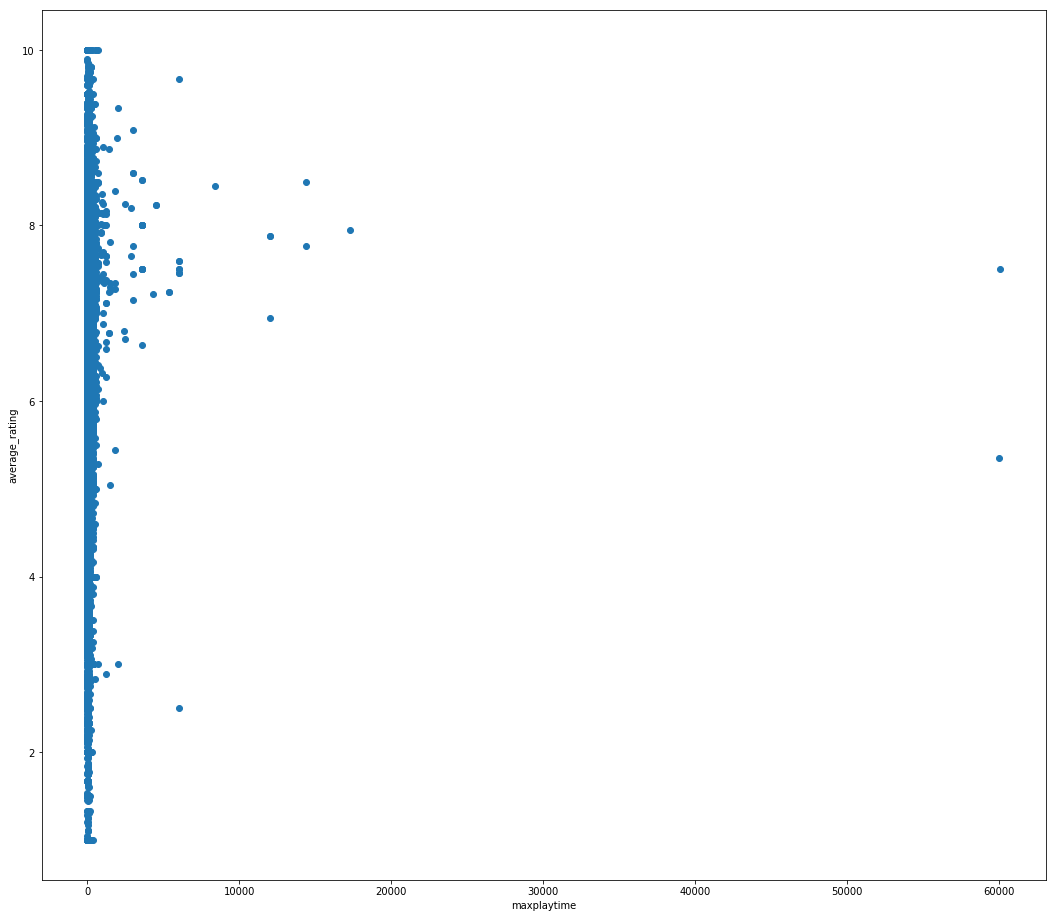

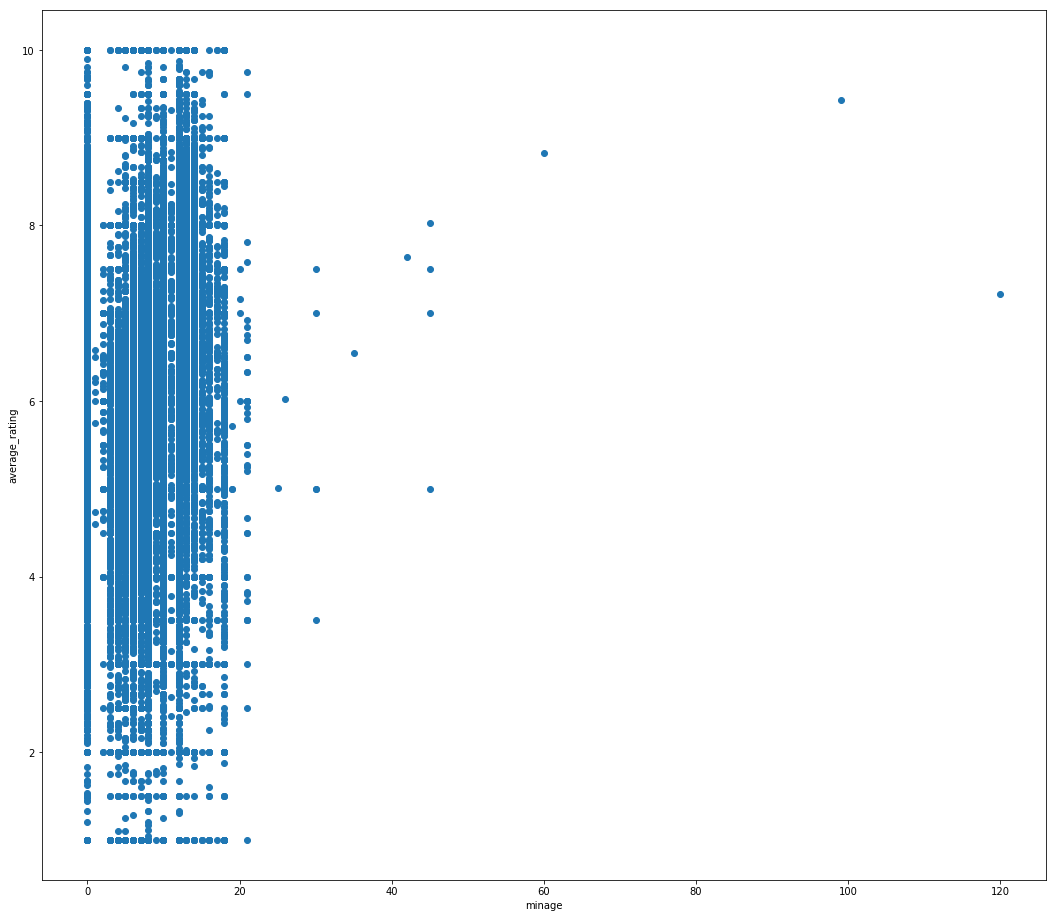

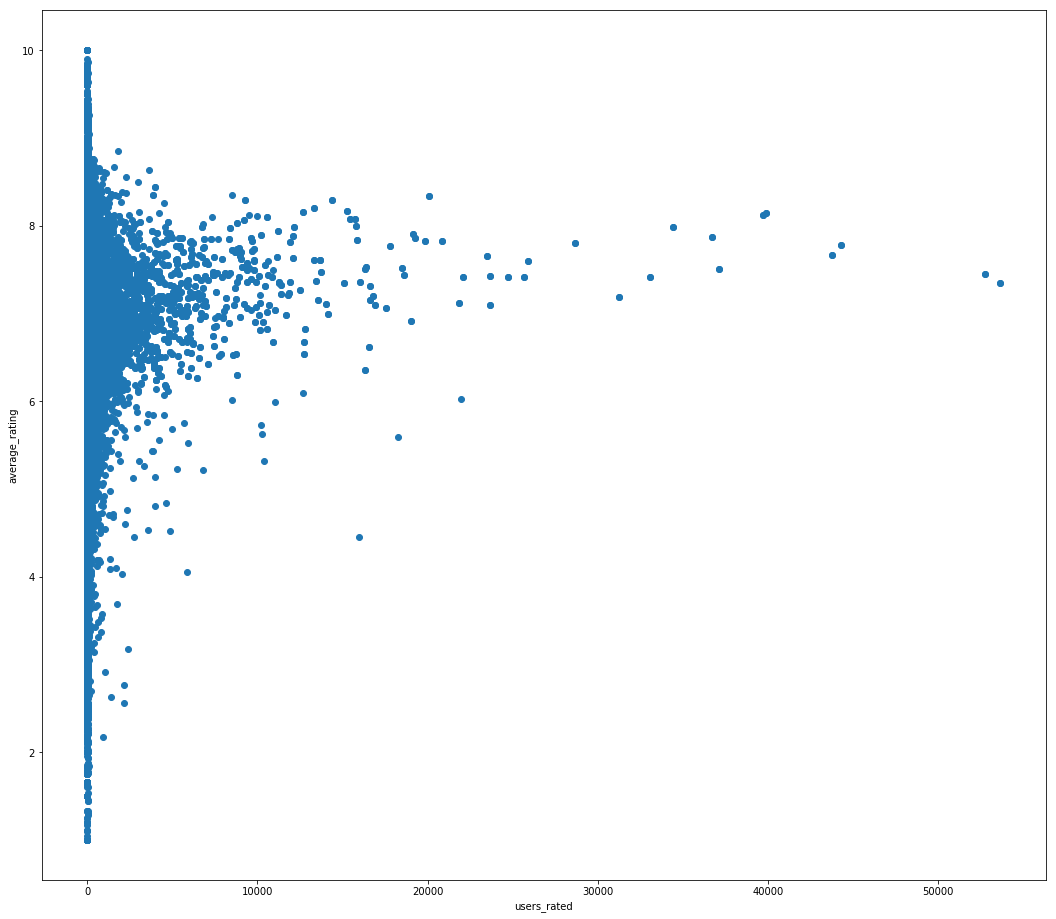

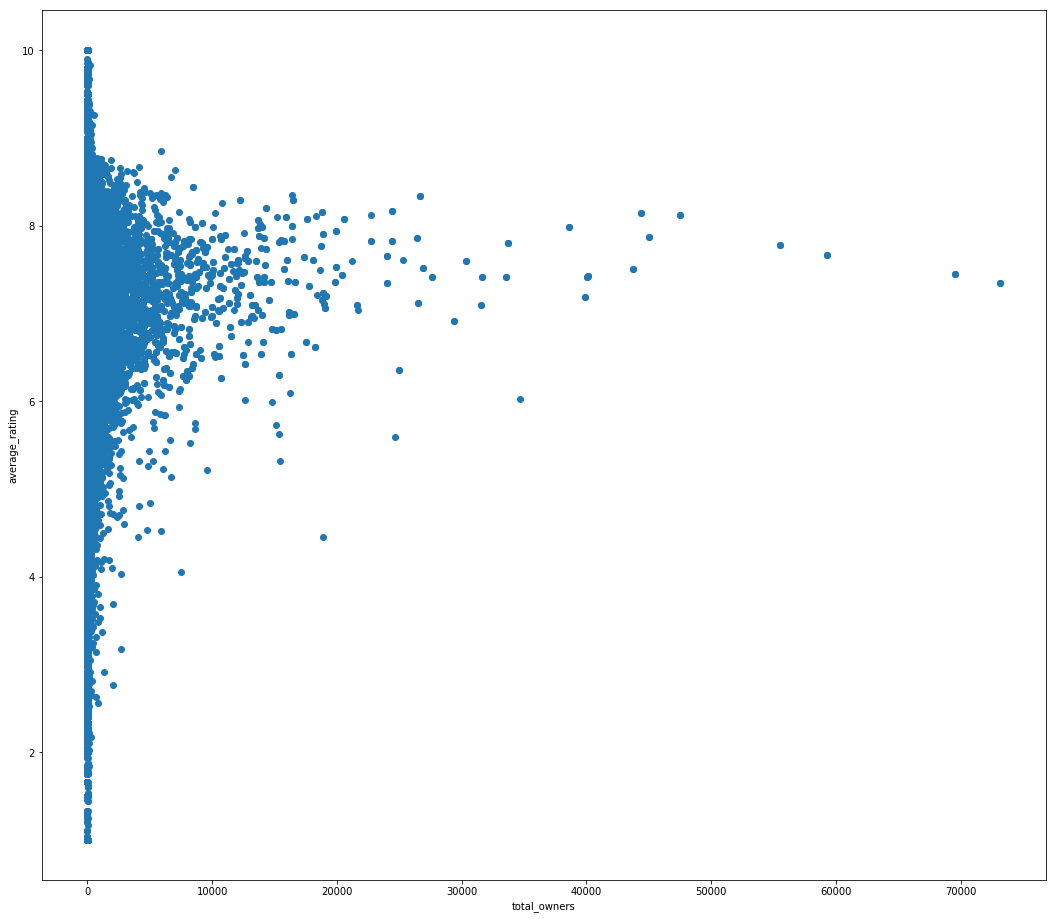

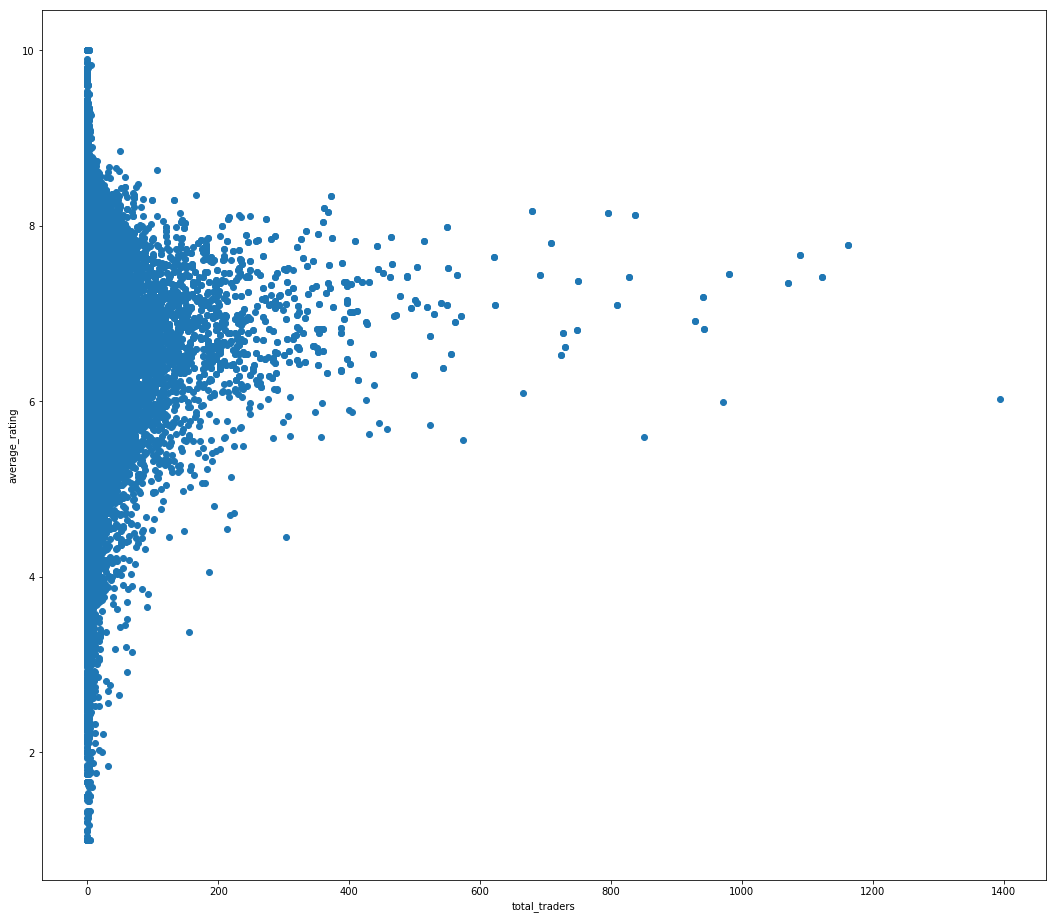

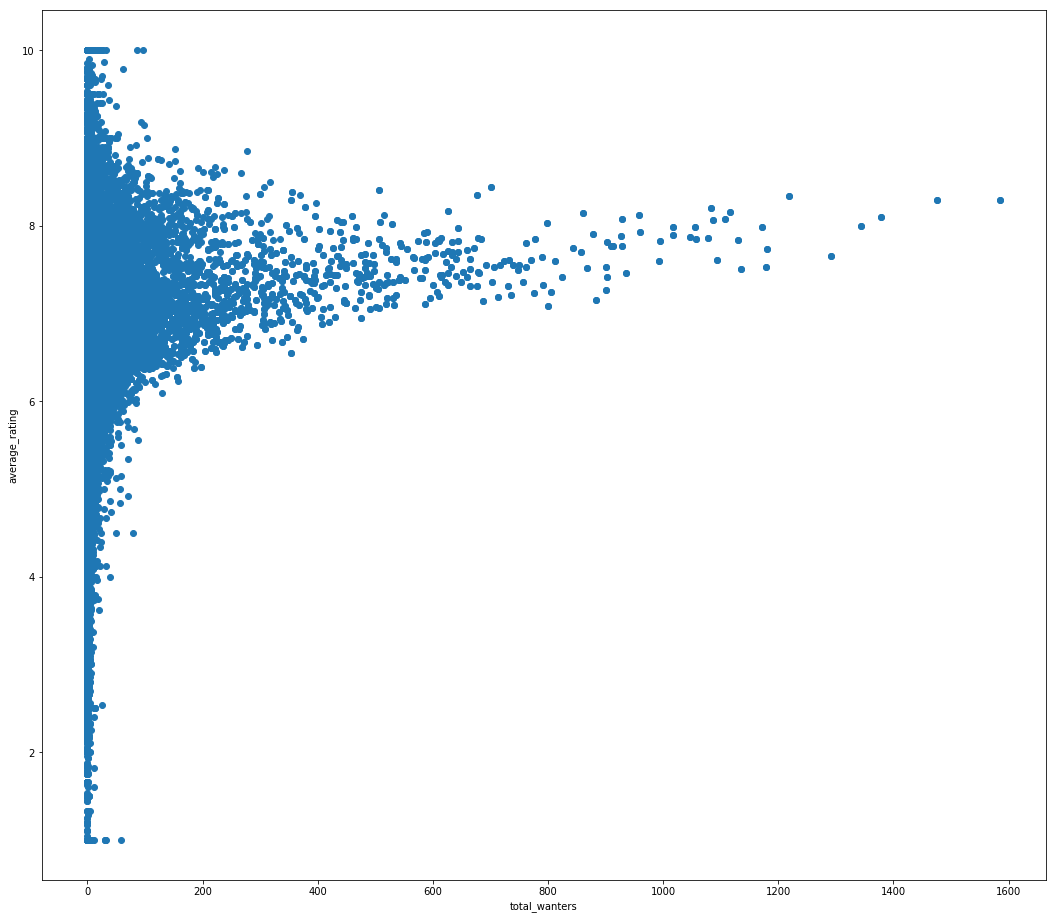

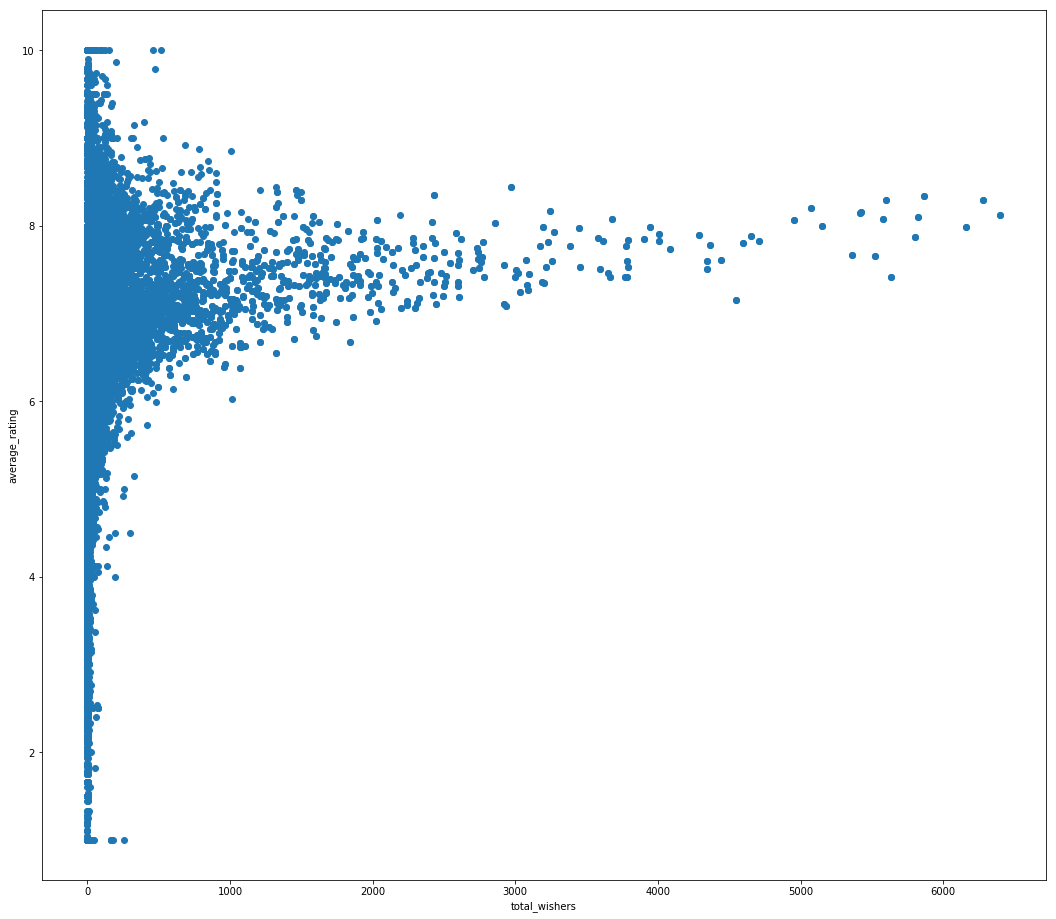

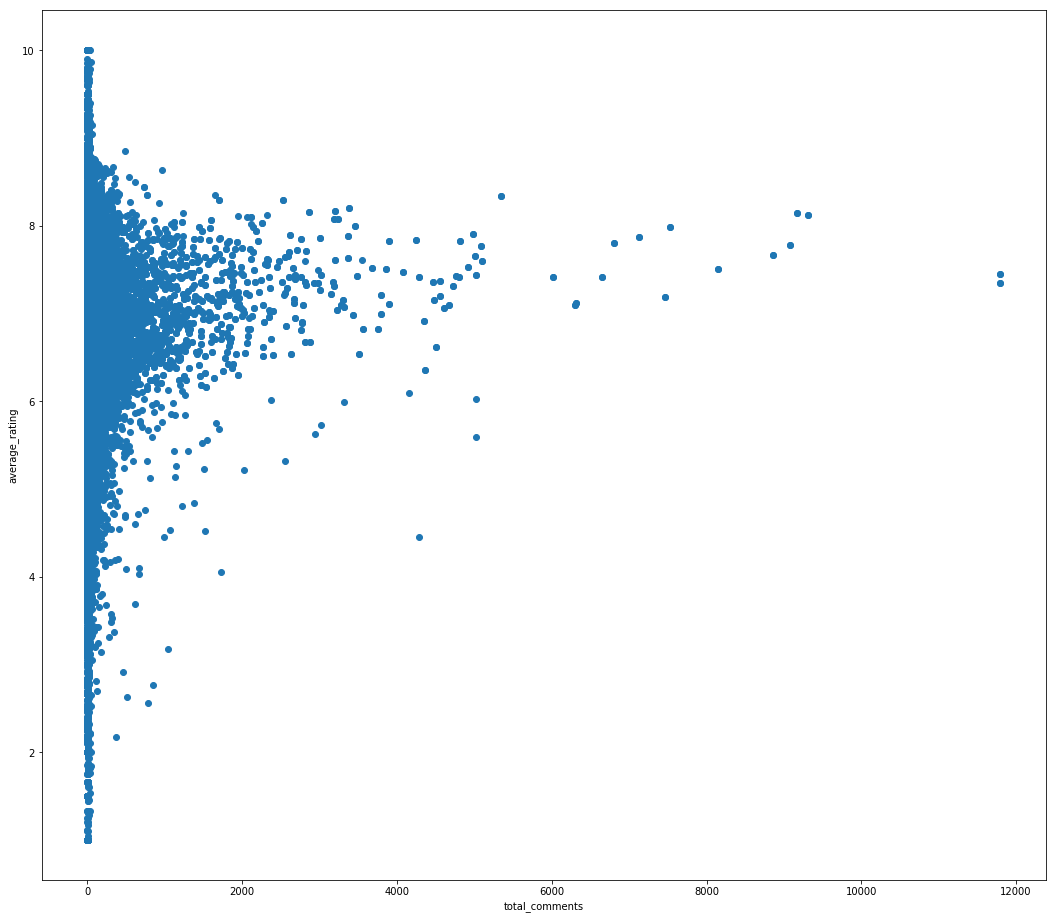

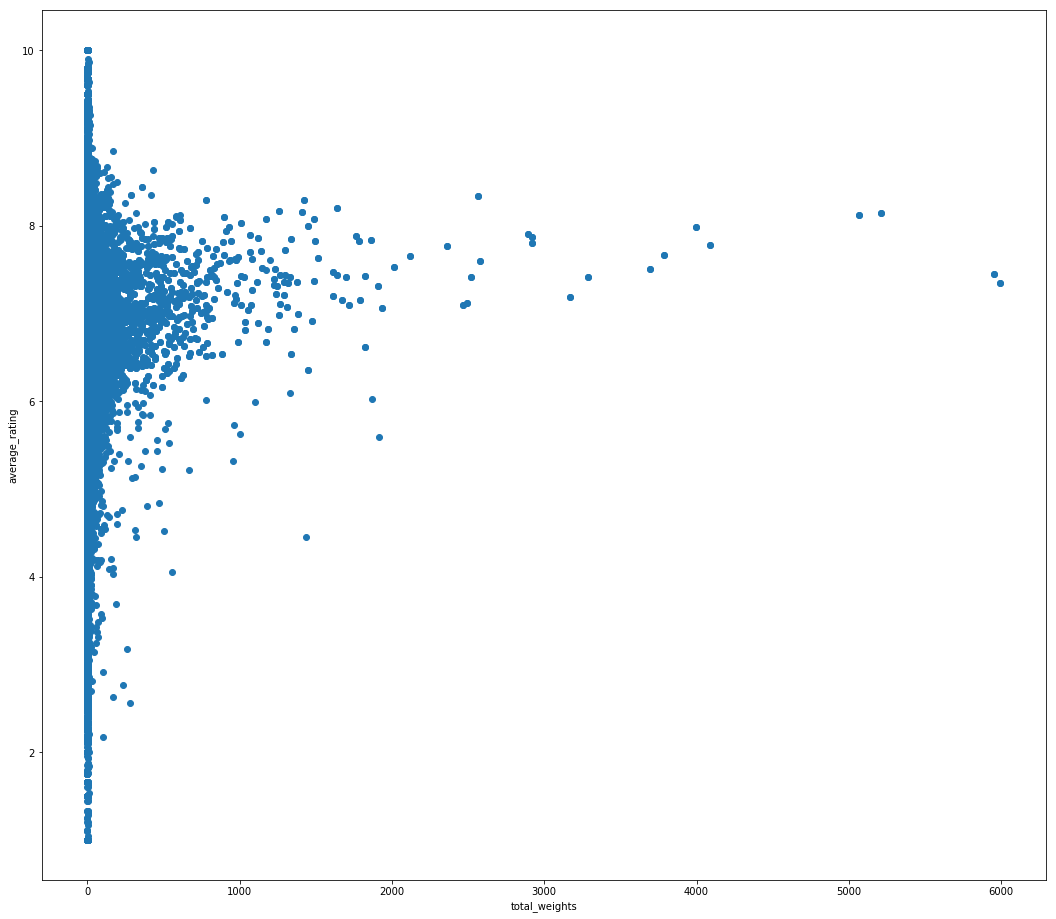

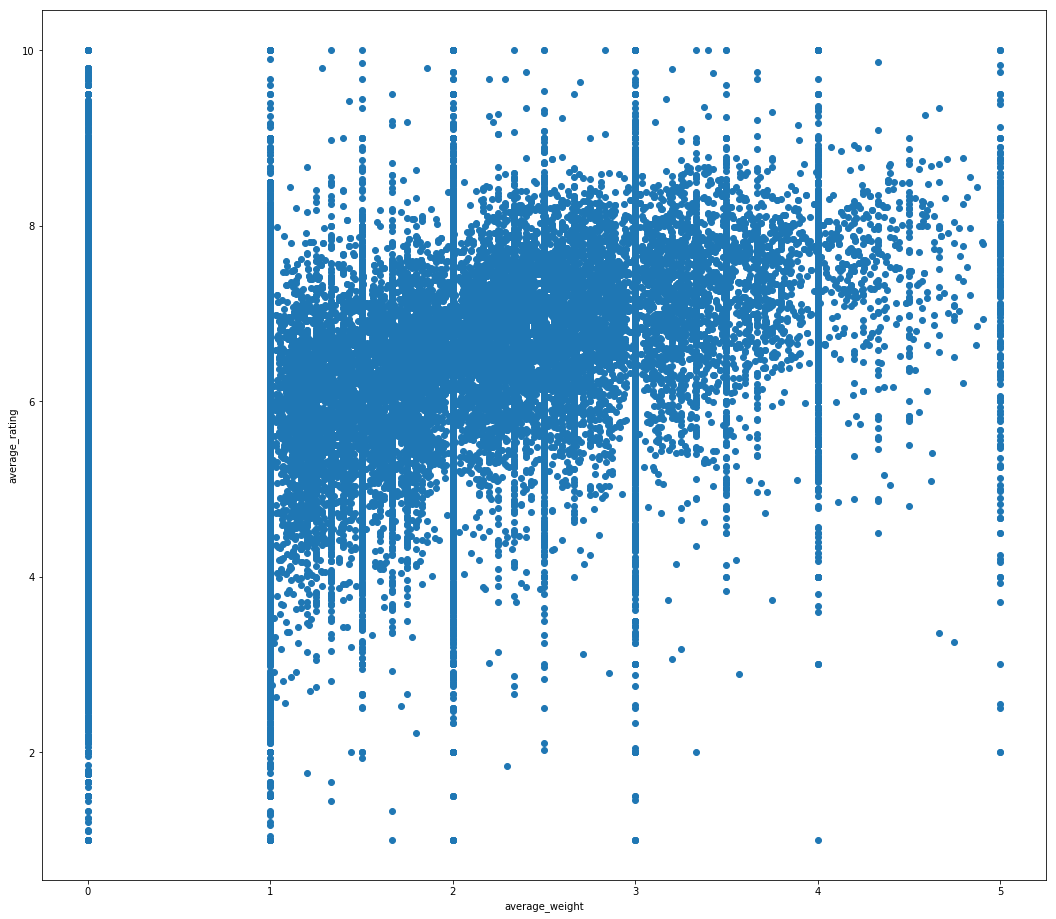

In [11]:
dfx = df.drop(columns=["average_rating"])
dfy = df["average_rating"]

for i in range(len(dfx.columns)):
    x = dfx.iloc[:,i].values
    y = dfy.values
    plt.figure(figsize=(18,16))
    plt.scatter(x, y)
    plt.xlabel(dfx.columns[i])
    plt.ylabel("average_rating")
    plt.show()

For the plot between average_rating and year published, there are plenty of boardgames, where year published is 0 or even less than 0. All these rows with illogical data are dropped. The analysis is restricted for the board games whose publishing year is after 1800.
Similiarly, other modifications are conducted to the data-set to eliminate extreme ends of the data and to make the model more generalised. The modification to the data-set is listed below.

The shape of the data-frame after modification reveals the number of rows lost in dataframe modification, approximately, 5000 rows are lost in the modification. But that is okay since most of these data were extreme and at times it made no sense to use them either for training or testing. 

In [12]:
df = df[df["yearpublished"]>1800]
df = df[df["minplayers"]<15]
df = df[df["maxplayers"]<100]
df = df[df["playingtime"]<500]
df = df[df["minage"]<20]
df = df[df["minplaytime"]<200]
df = df[df["maxplaytime"]<200]
print(df.shape)

(51055, 16)


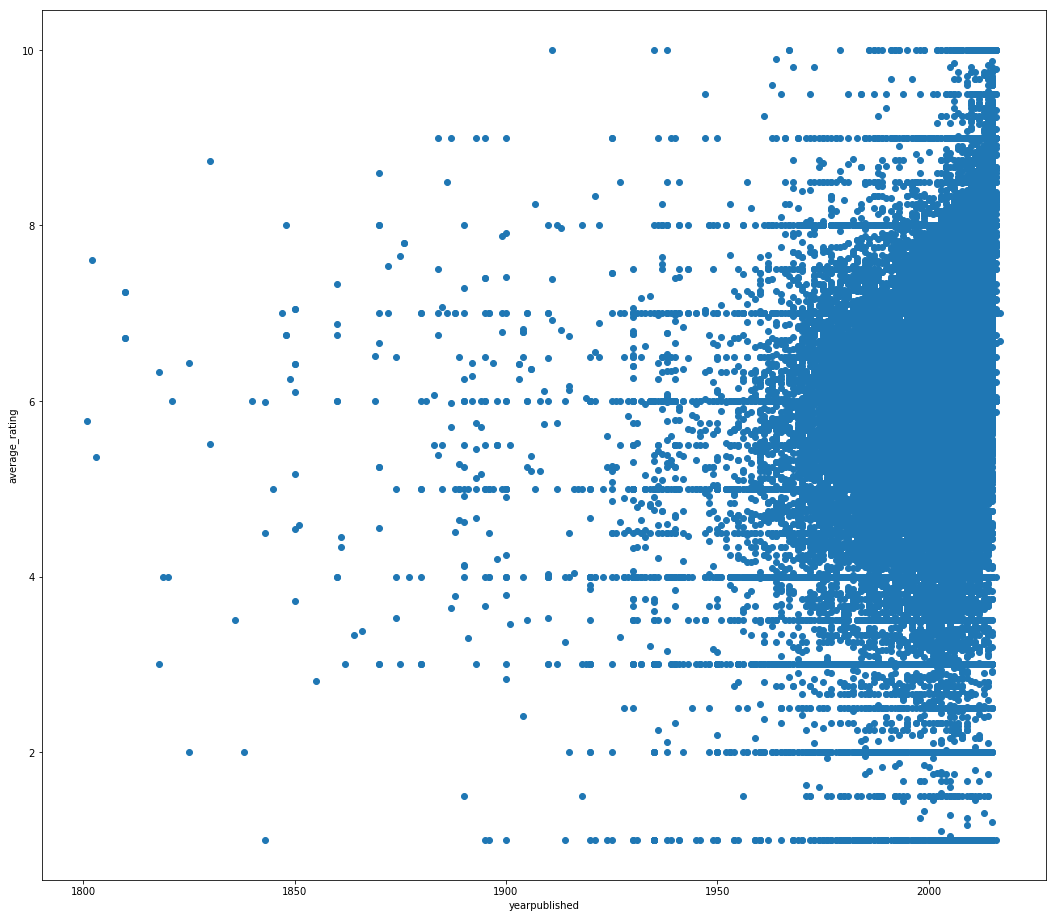

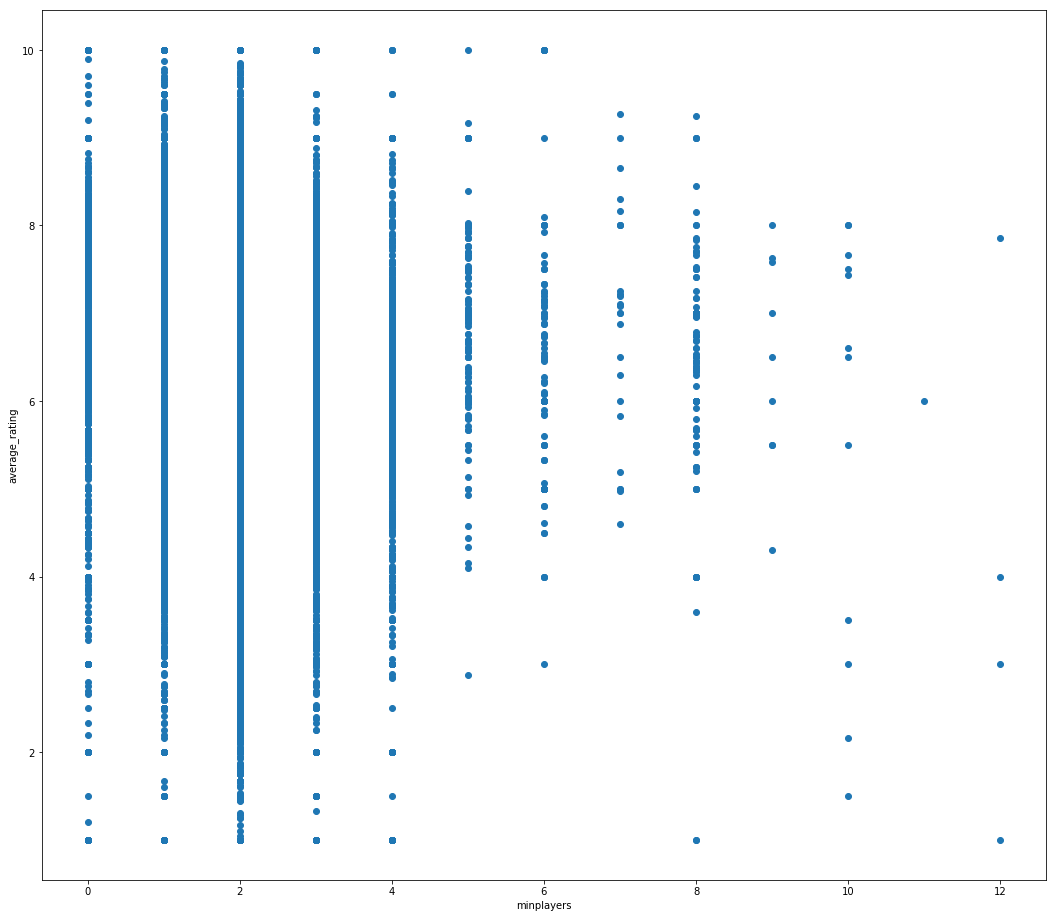

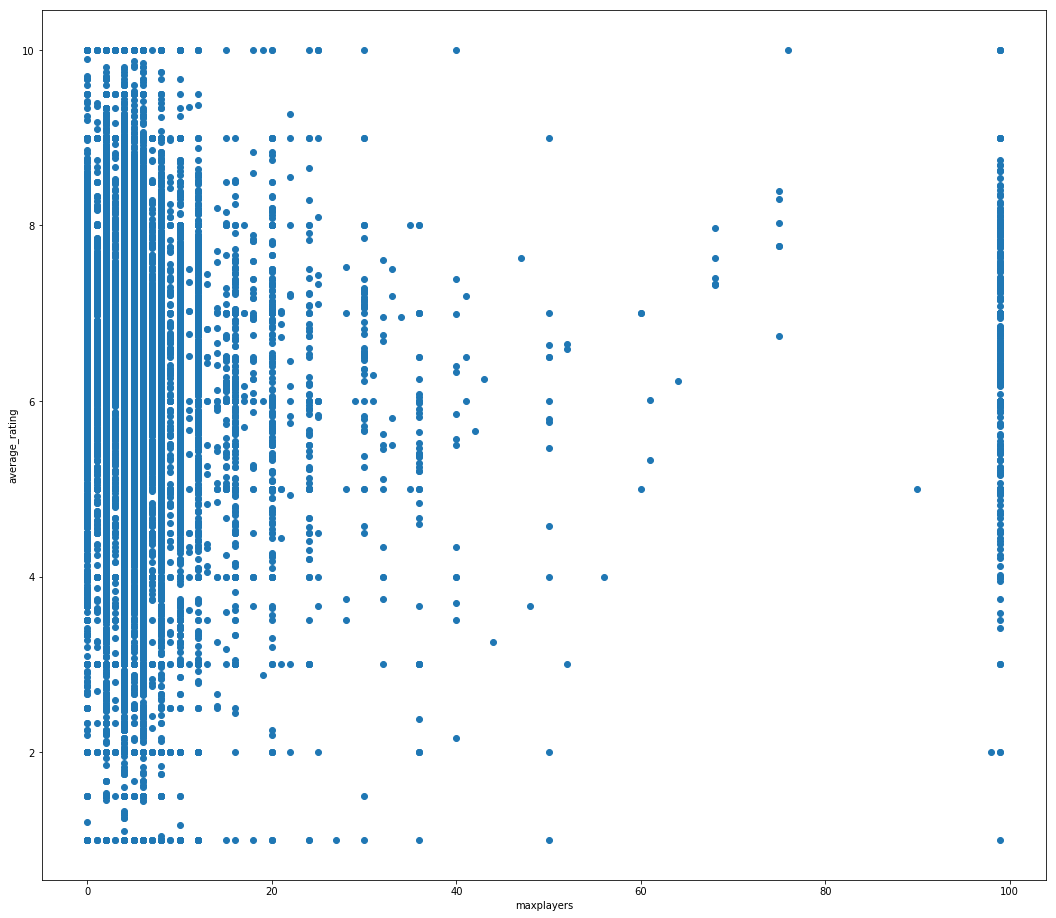

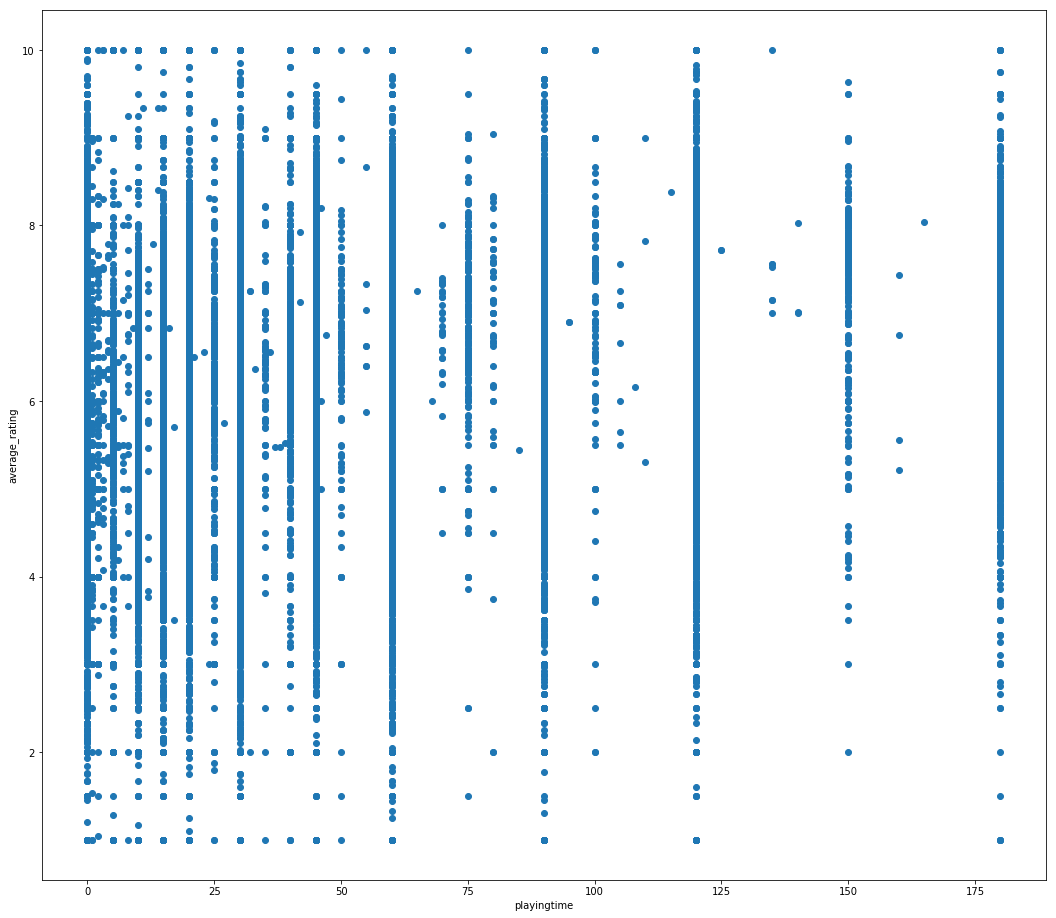

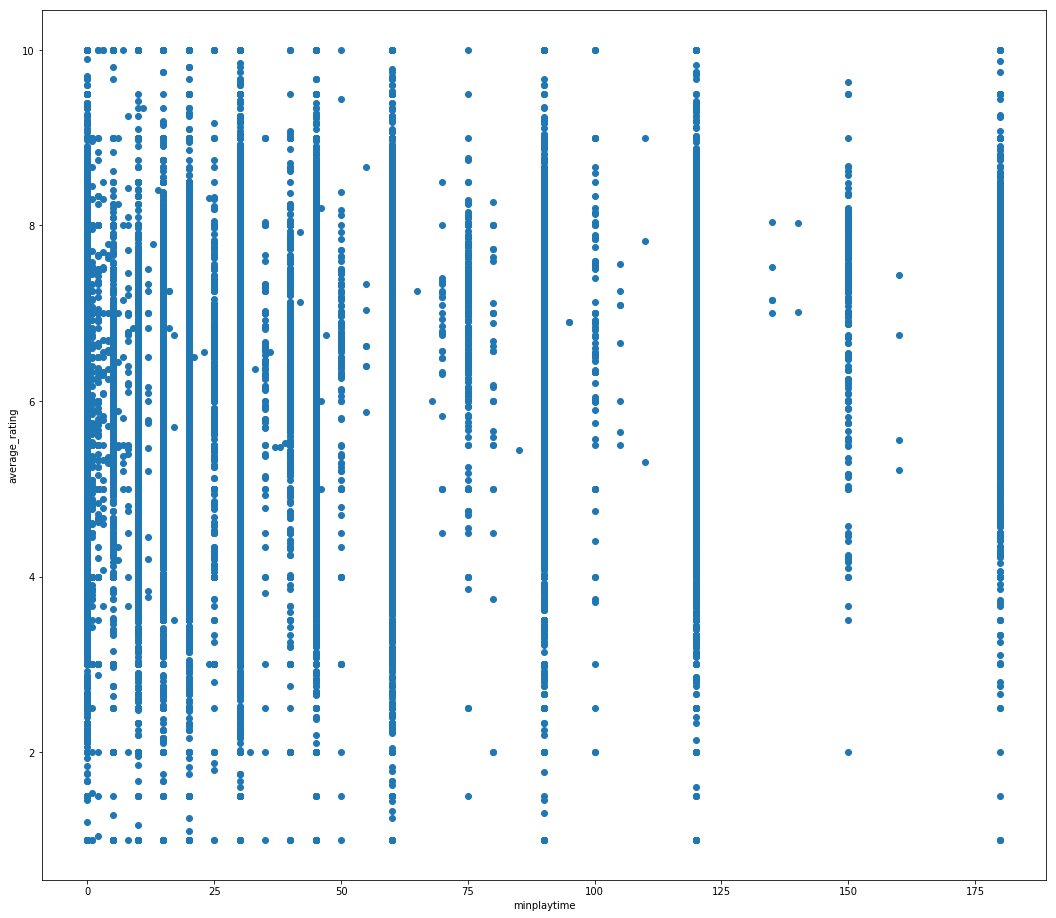

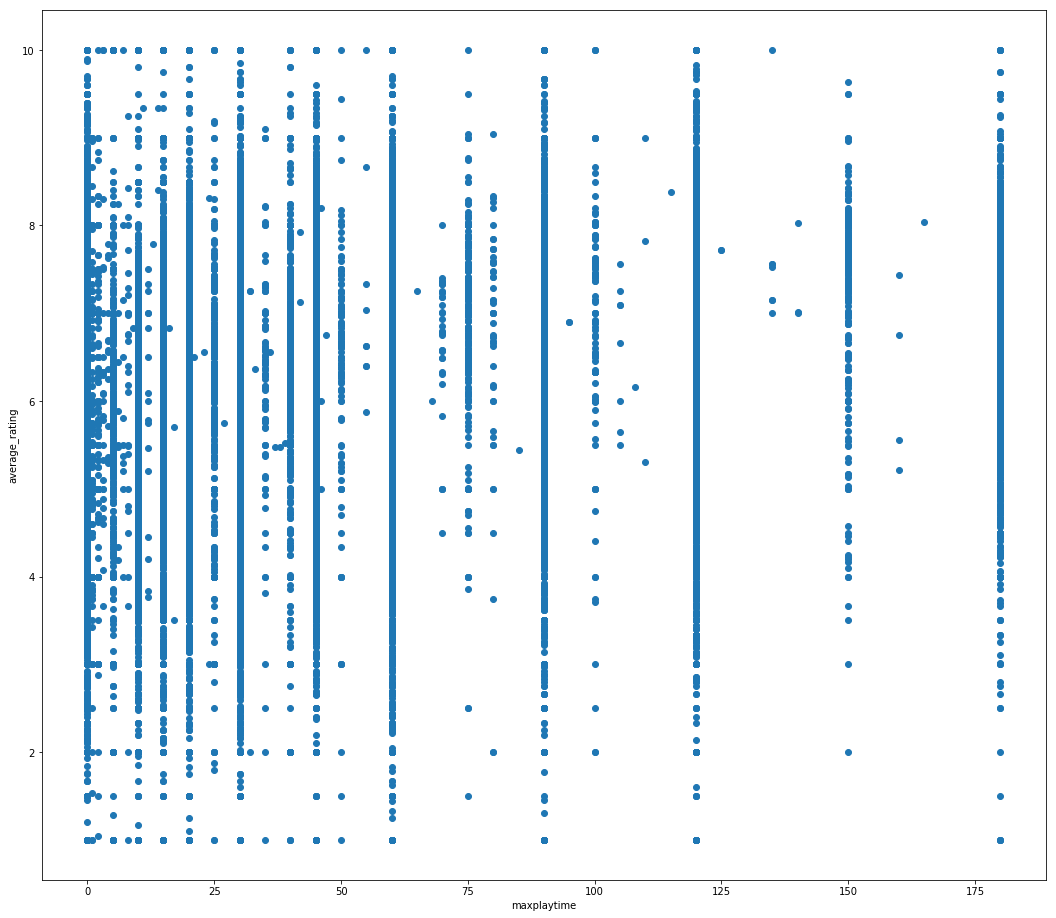

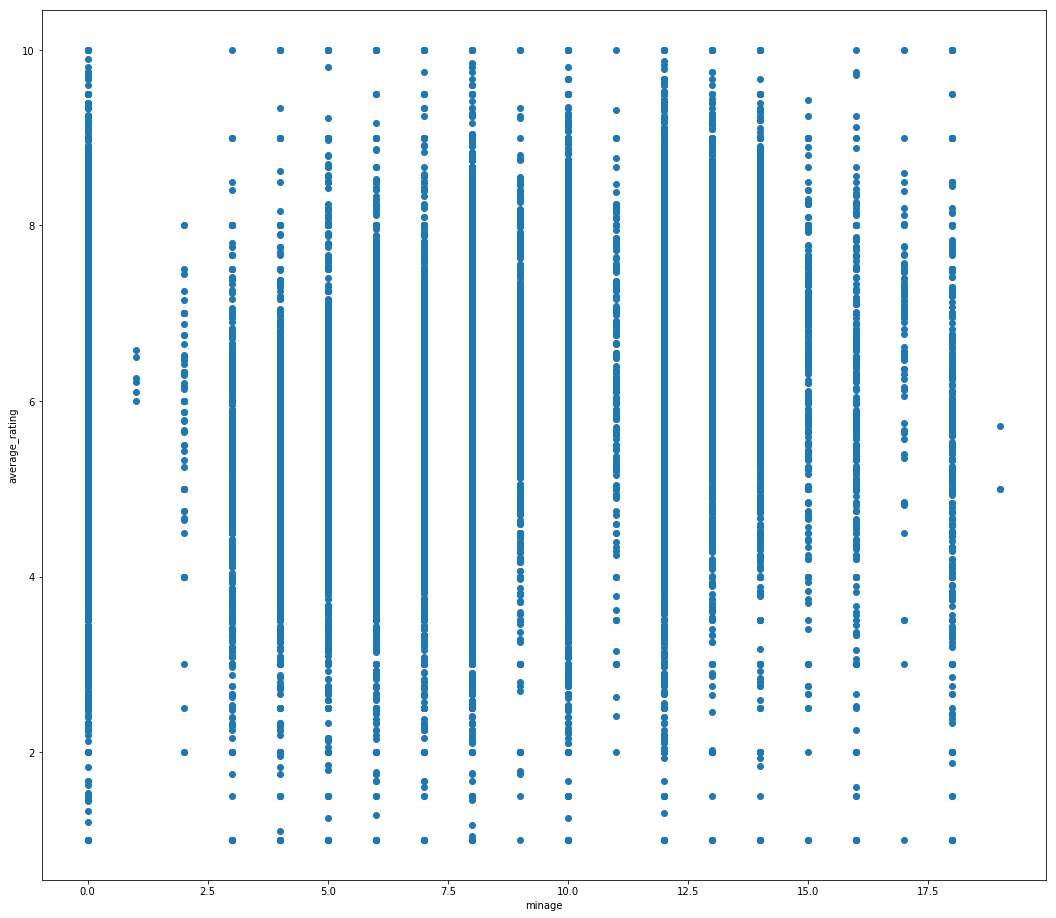

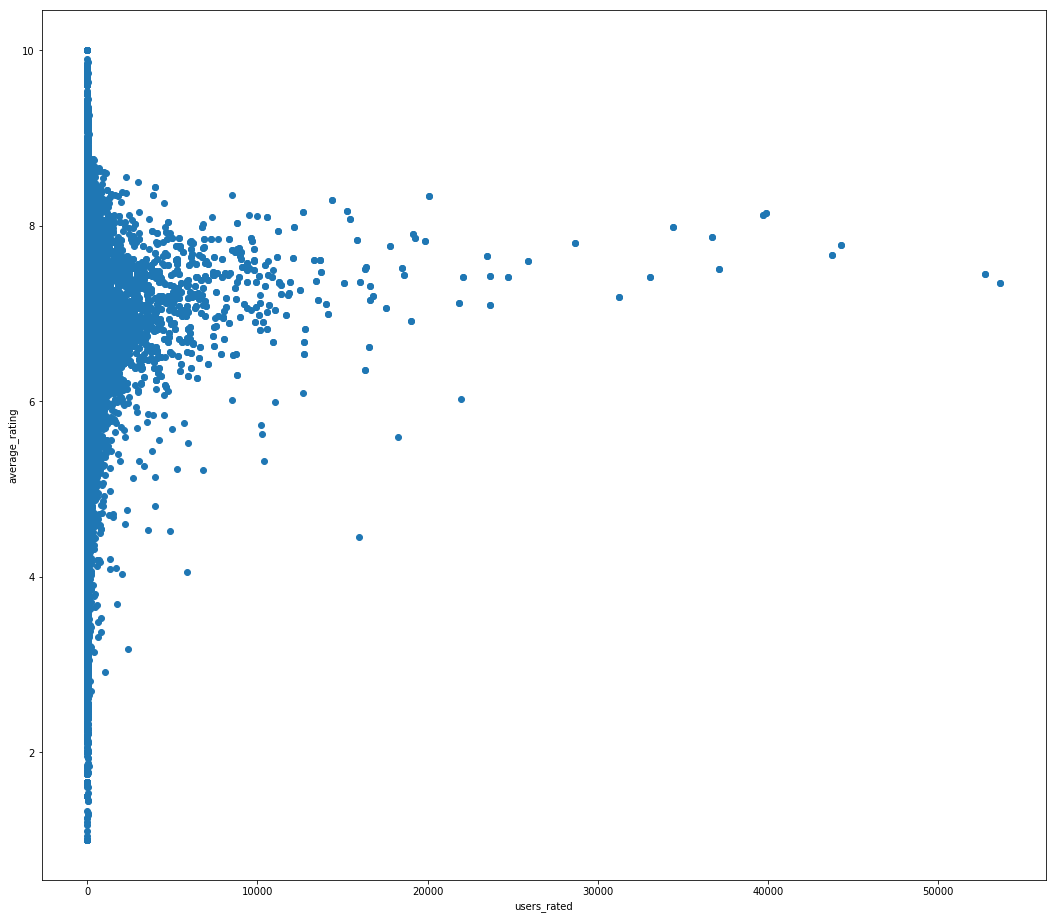

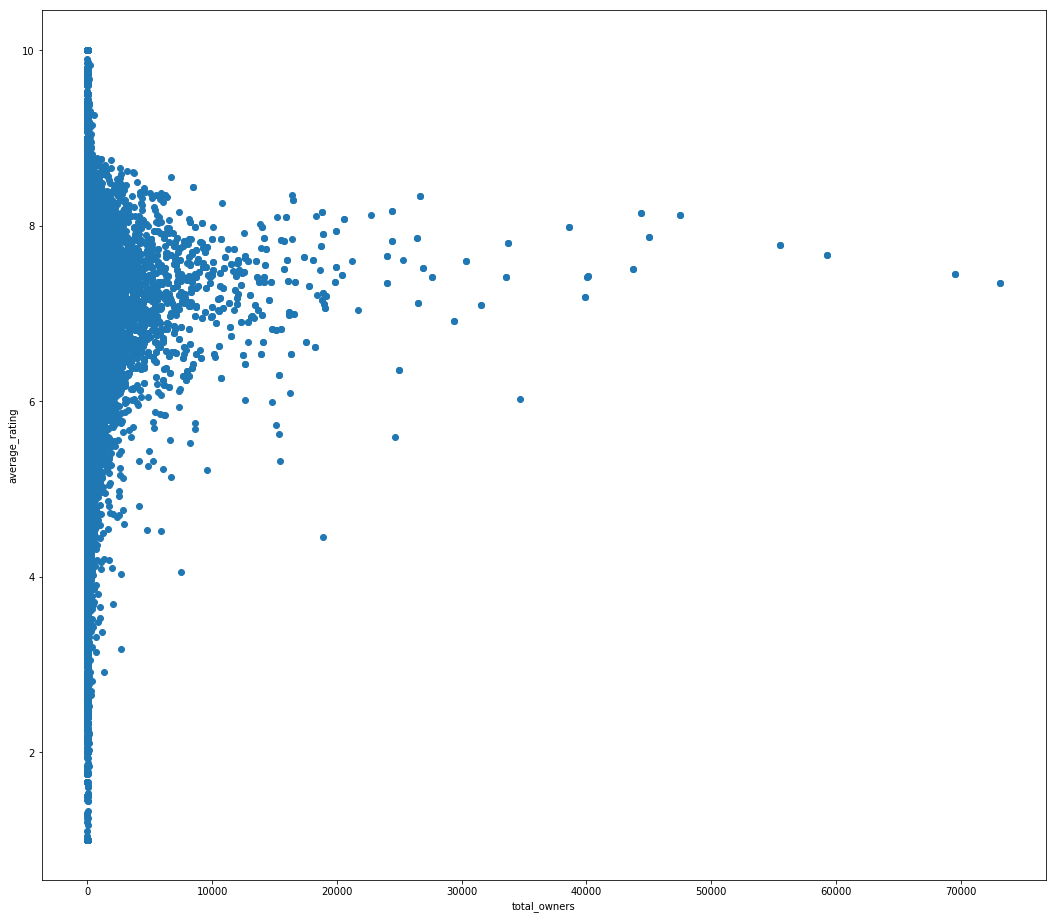

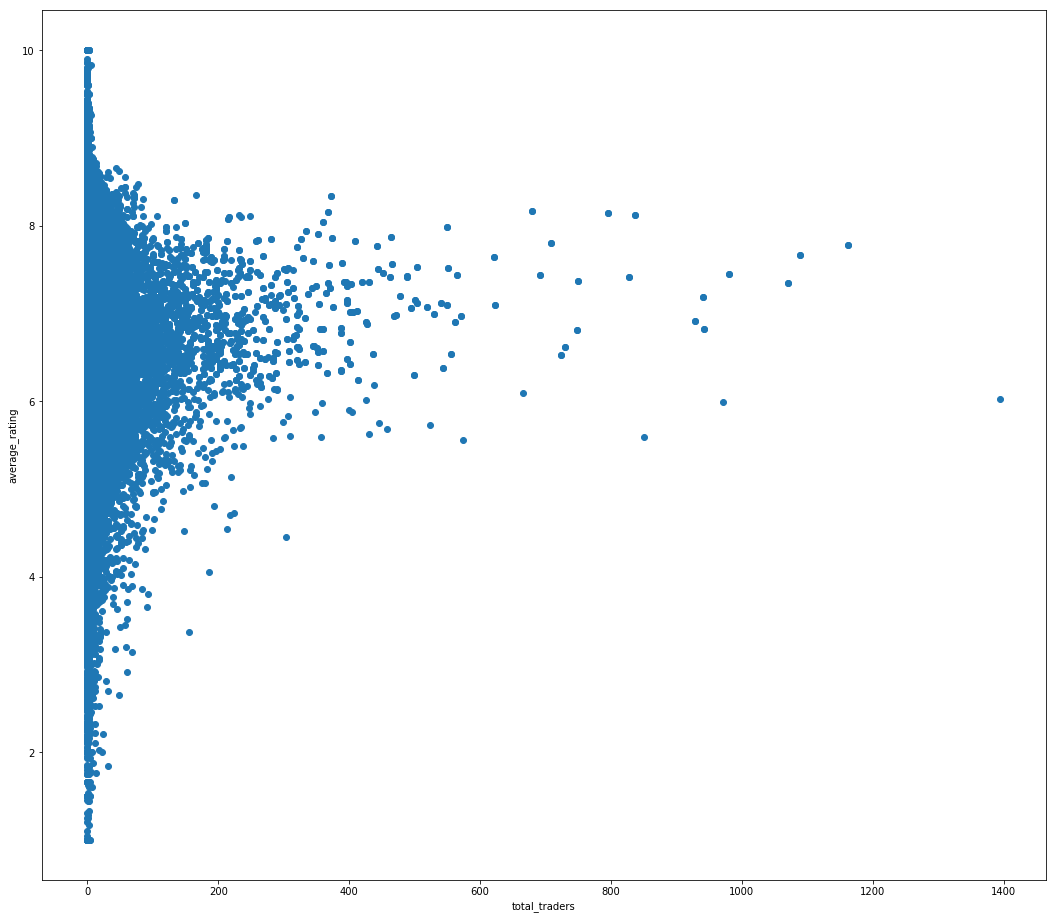

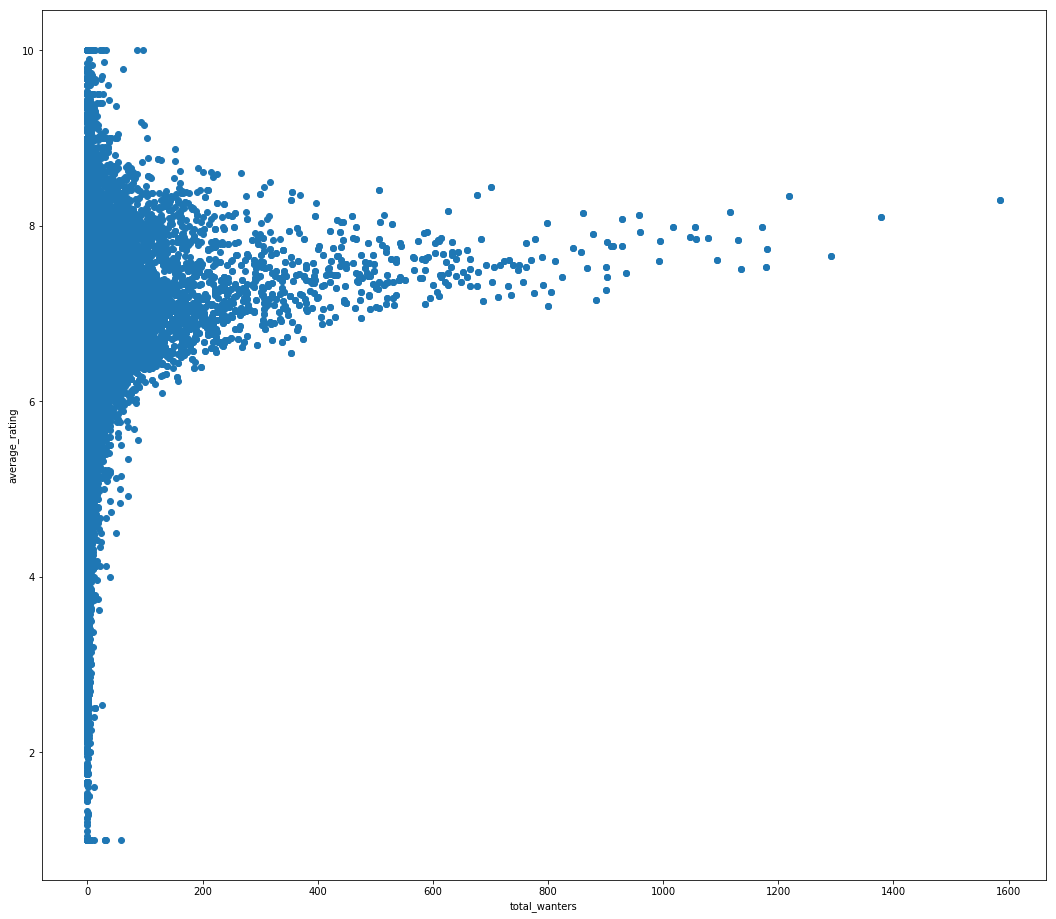

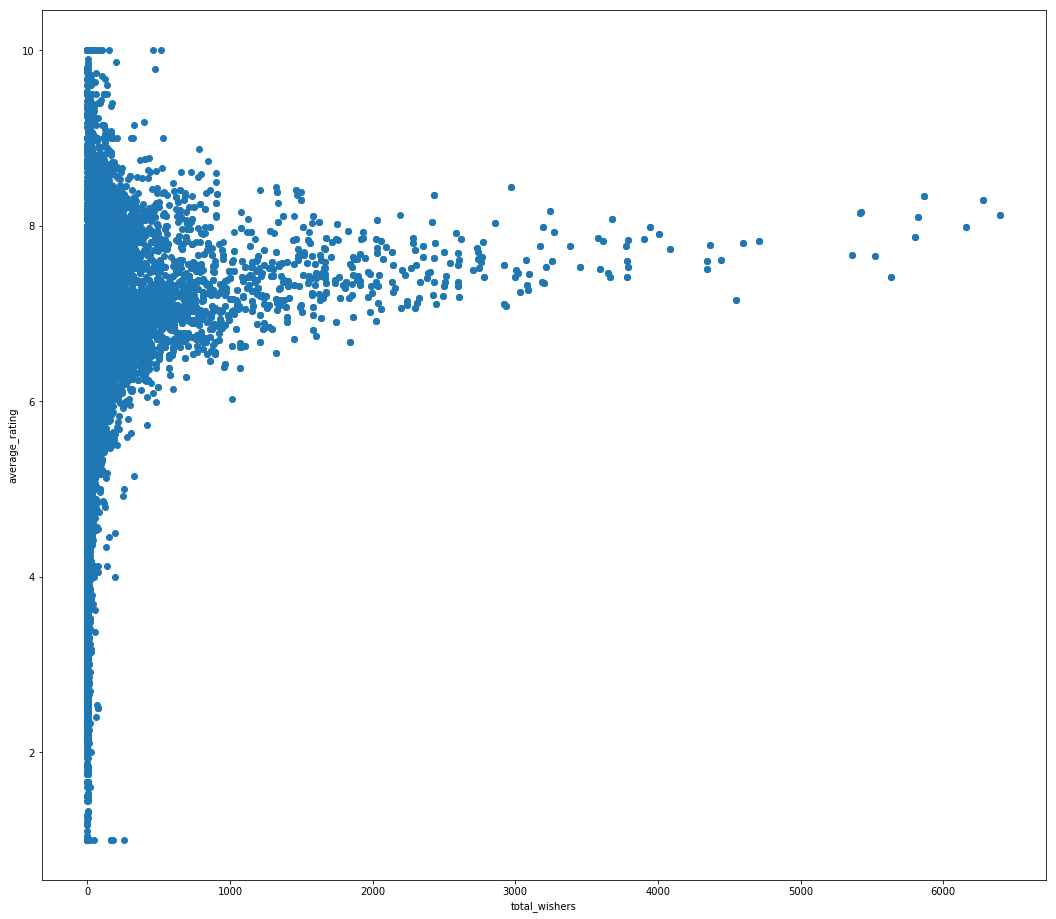

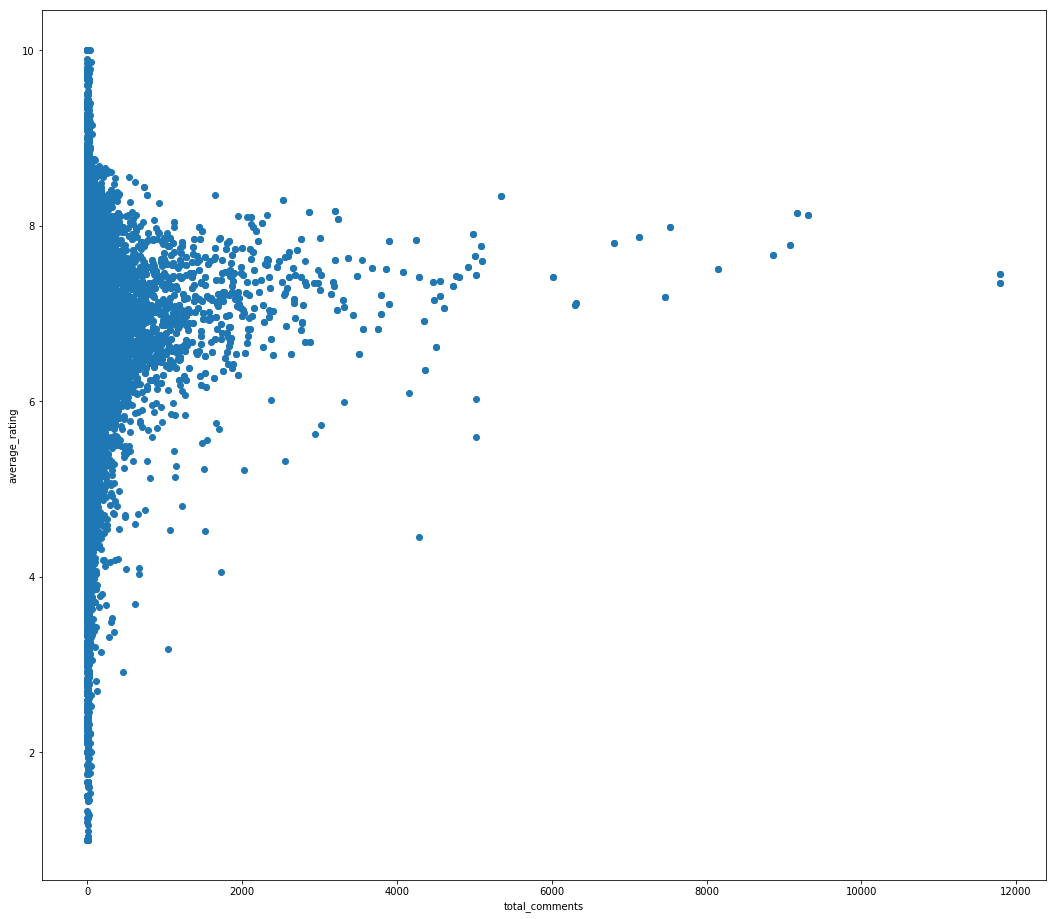

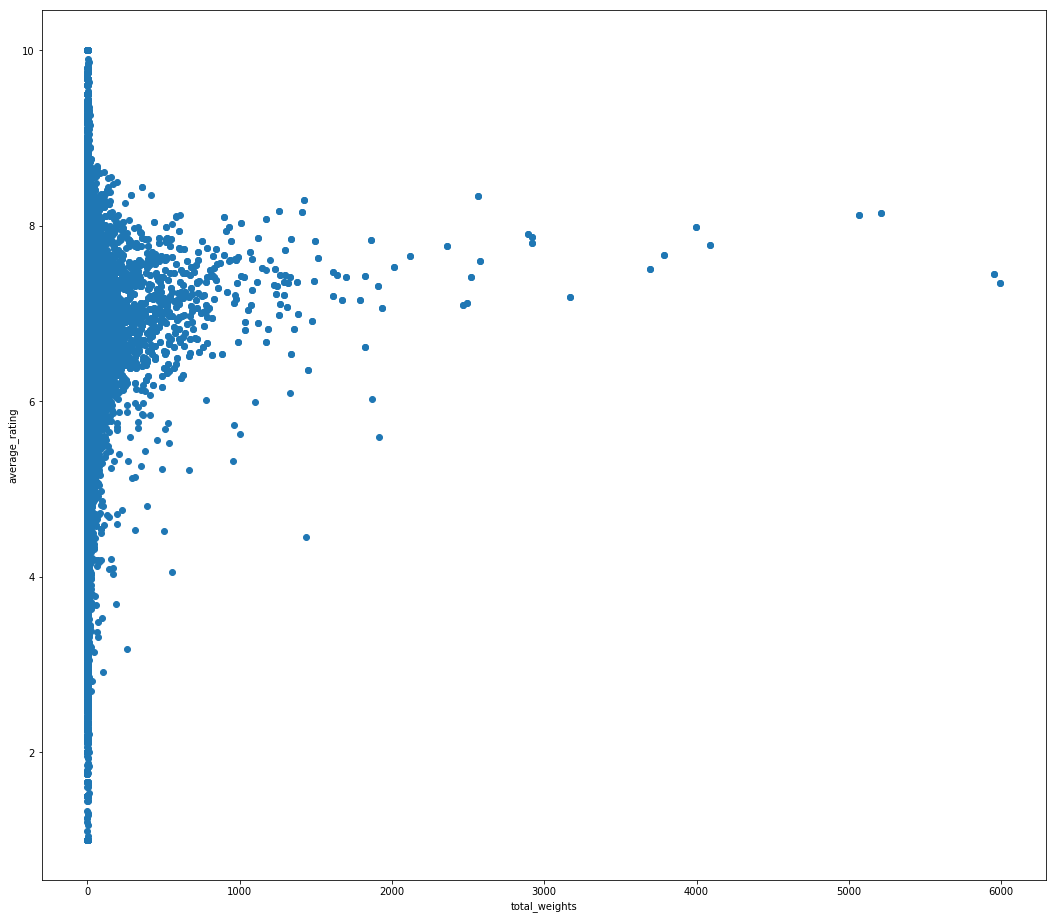

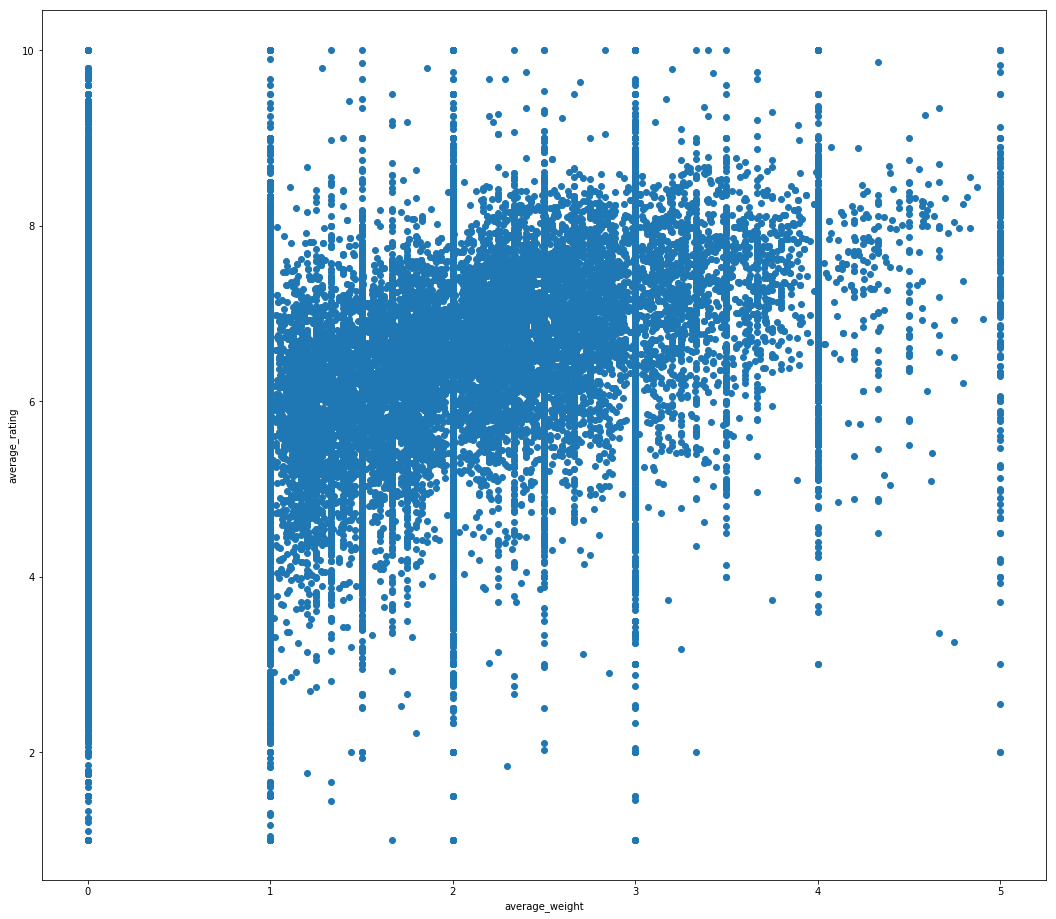

In [13]:
dfx2 = df.drop(columns=["average_rating"])
dfy2 = df["average_rating"]

for i in range(len(dfx2.columns)):
    x2 = dfx2.iloc[:,i].values
    y2 = dfy2.values
    plt.figure(figsize=(18,16))
    plt.scatter(x2, y2)
    plt.xlabel(dfx2.columns[i])
    plt.ylabel("average_rating")
    plt.show()

After data modification, the graphs plotted are dont have extreme values. The sparsity of the plots are reduced to a great extent.

Plots also show that there is no general trend between average_rating and most of the other dependent variables. However, average_weight follows a somewhat linear relation. 
To further analyse the relationship between dependent and independent variables, a coorelation heatmap is plotted.

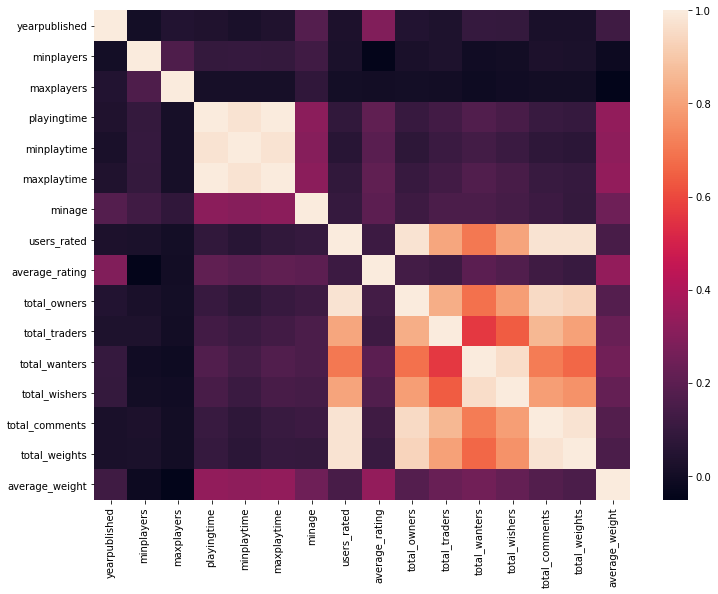

In [14]:
correlation_matrix = df.corr()
fig = plt.figure(figsize = (12, 9))
sns.heatmap(correlation_matrix, xticklabels=correlation_matrix.columns, yticklabels=correlation_matrix.columns)

As can be seen from the graph, the coorelation coefficient between average_rating feature and other independent features is very low. The coorelation coefficient is maximum for yearpublished and averageweight. 

The regression models used for prediction are linear, Random forest and KNN. Data-set is split into two parts, namely the training data and the testing data. This splitting is done at random. Training data contains 80 percent of all the available data while the testing data contains the remaining 20 percent.

In [15]:
X = df.drop(columns=['average_rating']).values
Y = df['average_rating'].values

train_x, test_x, train_y, test_y = train_test_split(X, Y, test_size=0.2, random_state=4)

model_LR = LinearRegression().fit(train_x, train_y)
model_RFR = RandomForestRegressor(n_estimators = 50, max_depth = 6).fit(train_x, train_y)

y_true = test_y

y_pred_LR = model_LR.predict(test_x)
y_pred_RFR= model_RFR.predict(test_x)

MSE_LR = mean_squared_error(y_true, y_pred_LR)
MSE_RFR = mean_squared_error(y_true, y_pred_RFR)

MAE_LR = mean_absolute_error(y_true, y_pred_LR)
MAE_RFR = mean_absolute_error(y_true, y_pred_RFR)

print("Mean Squared Error for Linear Regressor", "%.2f" % MSE_LR)
print("Mean absolute Error for Linear Regressor", "%.2f" %MAE_LR)

print("Mean Squared Error for Random Forest Regressor", "%.2f" % MSE_RFR)
print("Mean absolute Error for Random Forest Regressor", "%.2f" %MAE_RFR)

Mean Squared Error for Linear Regressor 1.90
Mean absolute Error for Linear Regressor 1.02
Mean Squared Error for Random Forest Regressor 1.54
Mean absolute Error for Random Forest Regressor 0.90


In [16]:
X_KNN = X
Y_KNN = Y

from sklearn import preprocessing
X_KNN = preprocessing.normalize(X)

train_xKNN, test_xKNN, train_yKNN, test_yKNN = train_test_split(X_KNN, Y_KNN, test_size=0.2, random_state=4)

y_true_KNN = test_yKNN

MSE_array = []
MSE_min = 10^12
k_best = 5
k_array = []
from sklearn.neighbors import KNeighborsRegressor
for k in range(5,200):
    model = KNeighborsRegressor(n_neighbors=k) 
    model.fit(train_xKNN, train_yKNN)
    y_pred = model.predict(test_xKNN)
    MSE_temp = mean_squared_error(y_true_KNN, y_pred)
    
    if MSE_temp < MSE_min:
        MSE_min = MSE_temp
        k_best = k
    MSE_array.append(MSE_temp)
    k_array.append(k)

print("Best k parameter is ", k_best)

Best k parameter is  18


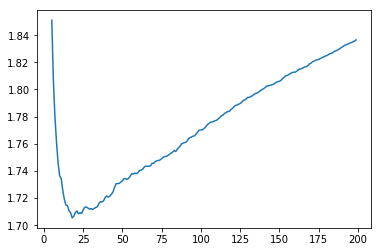

In [17]:
plt.plot(k_array, MSE_array)
plt.show()

In [18]:
model_KNN = KNeighborsRegressor(n_neighbors=k_best)
model_KNN.fit(train_xKNN, train_yKNN)
y_pred_KNN = model_KNN.predict(test_xKNN)

MSE_KNN = mean_squared_error(y_true_KNN, y_pred_KNN)
MAE_KNN = mean_absolute_error(y_true_KNN, y_pred_KNN)
print("Mean Squared Error for KNN Regressor", "%.2f" % MSE_KNN)
print("Mean absolute Error for KNN Regressor", "%.2f" %MAE_KNN)

Mean Squared Error for KNN Regressor 1.71
Mean absolute Error for KNN Regressor 0.94


Mean squared error and mean abslute error for each of the three models are displayed above. Random forest model performs best among three, but performance parameters for KNN and Random forest don't have much of a difference.


